In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
plt.style.use('ggplot')
import seaborn as sns
import statistics

In [8]:
results = pd.read_csv("test_results/pg_duck_tpch_test_results.csv") 
test_name = "postgres_duck_db"

results = results.rename(columns={"Average": "Mean"})

In [9]:
print(len(results))
results.head()

88


,Data Type,Scaling Factor,Query Name,Query Number,Mean,Correct,Executed,Runs
0,SQL,1,Postgres,Query 1,6.370,True,Yes,"[6.4829206466674805, 6.112210273742676, 6.0885..."
1,SQL,1,Duck DB,Query 1,0.426,True,Yes,"[0.4917769432067871, 0.42227673530578613, 0.41..."
2,Pandas,1,Pandas Converted (Duck DB),Query 1,2.430,True,Yes,"[7.15959906578064, 1.510803461074829, 1.478646..."
3,Pandas,1,Pandas Converted (Postgres),Query 1,1.910,True,Yes,"[2.4505927562713623, 1.823503017425537, 1.7725..."
4,SQL,1,Postgres,Query 2,1.180,True,Yes,"[1.2991671562194824, 1.2142317295074463, 1.162..."


In [10]:
# Filter for Correct == True and Executed == Yes
results = results[(results.Correct == True) & (results.Executed == "Yes")]
print(len(results))

88


In [11]:
# Sort Query Name column to in-order
def extract_number(name):
    return int(name.split(" ")[1])

results['Query Number'] = results.apply(lambda row : extract_number(row['Query Number']), axis = 1)
results = results.sort_values(['Query Number'])

# Fix the runs column
def fix_runs(runs):
    new_runs = list(str(str(runs)[1:-1]).split(","))
    for i in range(0, len(new_runs)):
        new_runs[i] = float(new_runs[i].strip())
    return new_runs

results['Runs'] = results.apply(lambda row : fix_runs(row['Runs']), axis = 1)

results['Median'] = results.apply(lambda row: statistics.median(sorted(row['Runs'])), axis = 1)

def ignore_first_mean(runs):
    return statistics.mean(runs[1:])

results['Mean_first'] = results.apply(lambda row : ignore_first_mean(row['Runs']), axis = 1)
results["Query Type"] = results["Query Name"]

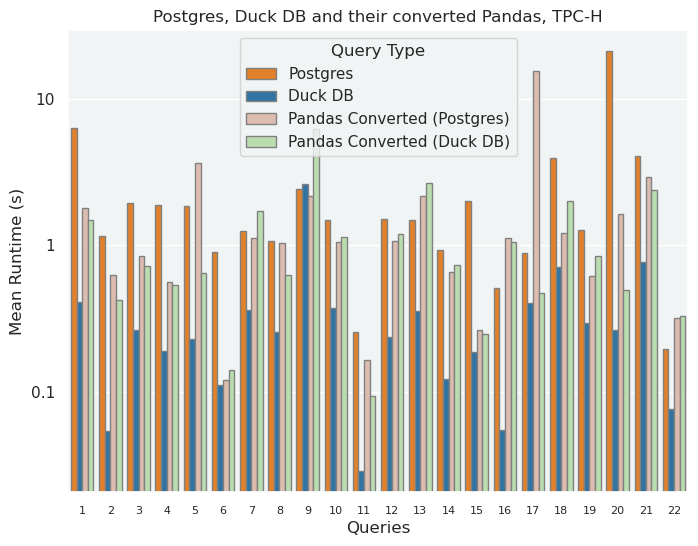

In [30]:
# plot with seaborn barplot
sns.set(rc={'figure.figsize':(8,6)})
background_color = '#f1f4f5'
sns.set(rc={'axes.facecolor':background_color})

color = ['tab:orange','tab:blue','#e5b8a8', '#b6e5a8']
order = ["Postgres", "Duck DB", "Pandas Converted (Postgres)", "Pandas Converted (Duck DB)"]

ax = sns.barplot(data=results, x='Query Number', y='Mean_first', hue='Query Type',
                 palette=color, hue_order=order, edgecolor=".5")
ax.set_yscale("log")
ax.set(xlabel='Queries', ylabel='Mean Runtime (s)')
plt.title("Postgres, Duck DB and their converted Pandas, TPC-H")

# the non-logarithmic labels 
ticks = [0.1, 1, 10]
ax.set_yticks(ticks)
ax.set_yticklabels(ticks)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=8)

plt.savefig("analysis_results/" + str(test_name) + "_compare_queries.svg")
plt.show()

In [ ]:
# Number to show peformance of each, in comparison to each other

In [31]:
results

,Data Type,Scaling Factor,Query Name,Query Number,Mean,Correct,Executed,Runs,Median,Mean_first,Query Type
0,SQL,1,Postgres,1,6.3700,True,Yes,"[6.4829206466674805, 6.112210273742676, 6.0885...",6.297565,6.353401,Postgres
1,SQL,1,Duck DB,1,0.4260,True,Yes,"[0.4917769432067871, 0.42227673530578613, 0.41...",0.417519,0.412585,Duck DB
2,Pandas,1,Pandas Converted (Duck DB),1,2.4300,True,Yes,"[7.15959906578064, 1.510803461074829, 1.478646...",1.477408,1.480695,Pandas Converted (Duck DB)
3,Pandas,1,Pandas Converted (Postgres),1,1.9100,True,Yes,"[2.4505927562713623, 1.823503017425537, 1.7725...",1.816832,1.801249,Pandas Converted (Postgres)
4,SQL,1,Postgres,2,1.1800,True,Yes,"[1.2991671562194824, 1.2142317295074463, 1.162...",1.185349,1.157287,Postgres
...,...,...,...,...,...,...,...,...,...,...,...
82,Pandas,1,Pandas Converted (Duck DB),21,2.4700,True,Yes,"[2.8079166412353516, 2.3924434185028076, 2.400...",2.399516,2.397441,Pandas Converted (Duck DB)
85,SQL,1,Duck DB,22,0.0775,True,Yes,"[0.08587646484375, 0.07711577415466309, 0.0767...",0.076920,0.075852,Duck DB
86,Pandas,1,Pandas Converted (Duck DB),22,0.3500,True,Yes,"[0.445145845413208, 0.32825613021850586, 0.330...",0.330569,0.330649,Pandas Converted (Duck DB)
84,SQL,1,Postgres,22,0.2020,True,Yes,"[0.22895050048828125, 0.19183015823364258, 0.1...",0.198058,0.196022,Postgres


In [ ]:
# Gaps between queries
# log ticks
# Change pandas colours
# Remove bar edges
# Make legend down RHS

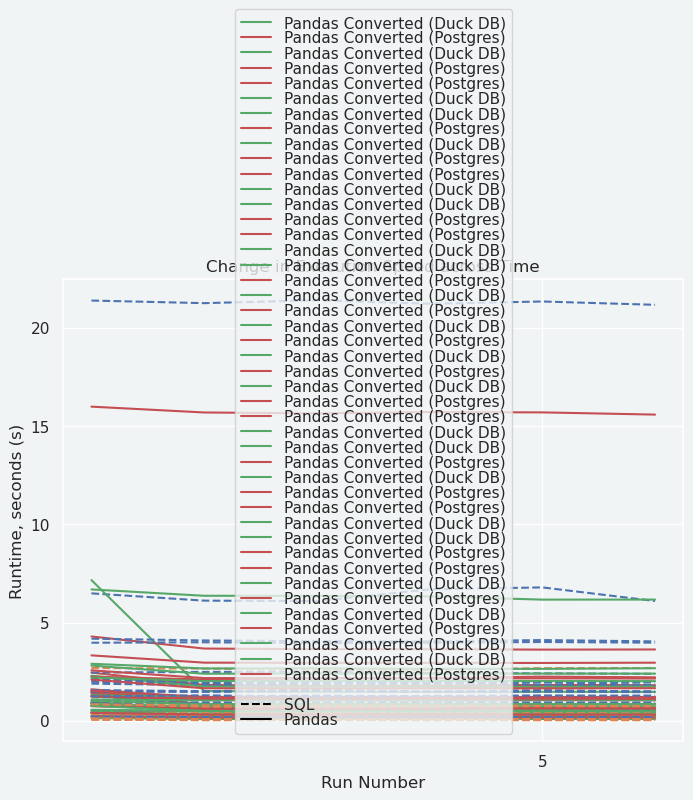

In [34]:
# Make graph of change in runtimes
# Y: Run time, X: Run Number
# Line: Query Number
prev_colors = {}

fig, ax = plt.subplots()

for index, row in results.iterrows():
    if row["Data Type"] == "SQL":
        line_style = 'dashed'
        legend_info = None
    else:
        line_style = 'solid'
        legend_info = row["Query Name"]
    
    # Choose line color
    if prev_colors.get(row["Query Name"], None) == None:
        # Not in dataframe
        line = ax.plot(list(range(1, len(row["Runs"])+1)), row["Runs"], label=legend_info, linestyle=line_style)
        prev_colors[row["Query Name"]] = line[0].get_color()
    else:
        color_line = prev_colors[row["Query Name"]]
        ax.plot(list(range(1, len(row["Runs"])+1)), row["Runs"], label=legend_info, linestyle=line_style, color=color_line)

# Add extra info to legend
ax.plot([], [], " ", label=" "*5,)
ax.plot([], [], label="SQL", color="black", linestyle="dashed")
ax.plot([], [], label="Pandas", color="black", linestyle="solid")

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(1))

plt.title('Change in Execution Speed across Time')
plt.xlabel('Run Number')
plt.ylabel('Runtime, seconds (s)')
ax.legend(labelspacing=0.01)
plt.savefig("analysis_results/" + str(test_name) + "_compare_queries_exec_time.pdf")
plt.show()